In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.sparse import diags
from scipy.sparse.linalg import factorized
from PIL import Image

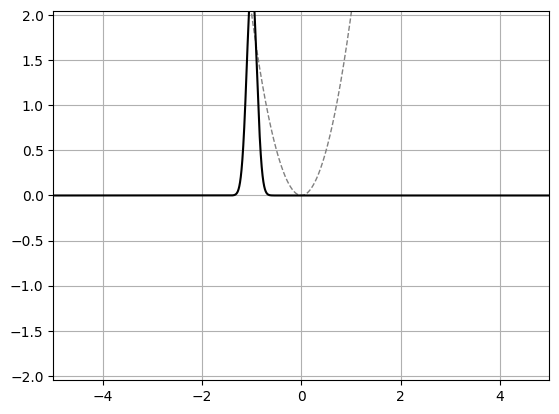

In [8]:
L = 5
T = 20

dx = 5e-4
dt = 1e-4

x = np.arange(-L-dx, L+dx, dx)
t = np.arange(0, T+dt, dt)

Nt, Nx = len(t), len(x)

def v(x):
    "Potential function"
    return (0.5*(2*x)**2)

def u_0(x):
    "Initial Condition"
    s = 0.1
    m = -1
    return 1/(np.pi*s**2)**(0.25) * np.exp(-0.5 * ((x-m)/s)**2)

fig, ax = plt.subplots()
ax.plot(x, v(x), color="gray", lw=1, label="Potential", ls="--")
ax.plot(x, np.abs(u_0(x)), color="black", lw=1.5)
ax.set_xlim(-L, L)
ax.set_ylim(-2.05, 2.05)
ax.grid()


In [ ]:
def save_gif_PIL(outfile, files, fps=5, loop=0):
    "Helper function for saving GIFs"
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=round(1000/fps), loop=loop)

def make_plot(save=False, file_name=f"PDE_solution.png", ti=0):
    "Helper function for plotting"
    fig, ax = plt.subplots()
    ax.plot(x, v(x), color="gray", lw=1, label="Potential", ls="--")
    ax.plot(x, np.abs(u[i, :]), color="black", lw=1.5)
    ax.plot(x, np.real(u[i, :]), color="Red", lw=1)
    ax.plot(x, np.imag(u[i, :]), color="Blue", lw=1)
    ax.set_xlim(-L, L)
    ax.set_ylim(-2.05, 2.05)
    ax.grid()
    ax.set_title(f"Time = {ti:.3f}s")
    if save:
        fig.savefig(file_name, bbox_inches="tight", pad_inches=0.1, dpi=100, facecolor="white")

: 

In [ ]:
u  = np.zeros((Nt, Nx), dtype=complex)
D2 = 1/(dx**2) * diags([1, -2, 1], [-1, 0, 1], shape=(Nx, Nx))
I  = diags([1], [0], shape=(Nx, Nx))
V  = diags(v(x), 0, shape=(Nx, Nx))

a = 1e-1
H = 1j*(a*D2 - V)
A = (I - dt/2 * H)
B = (I + dt/2 * H)

solve = factorized(A.tocsc())

for i, ti in enumerate(t):
    if i == 0:
        u[0, :] = u_0(x)
    else:
        uj = u[i-1, :]
        u[i, :] = solve(B @ uj)
    
    if np.max(np.abs(u[i, :])) > 1e2:
        print(f"Blow up at time {ti:.3f}s")
        break
    
    if i % int(1/dt * 1e-1) == 0:
        print(f"Time {ti:.3f}s, |psi|^2 = {np.trapz(np.abs(u[i, :])**2, x):.3f}")


Time 0.000s, |psi|^2 = 1.000
Time 0.100s, |psi|^2 = 1.000
Time 0.200s, |psi|^2 = 1.000
Time 0.300s, |psi|^2 = 1.000
Time 0.400s, |psi|^2 = 1.000
Time 0.500s, |psi|^2 = 1.000
Time 0.600s, |psi|^2 = 1.000
Time 0.700s, |psi|^2 = 1.000
Time 0.800s, |psi|^2 = 1.000
Time 0.900s, |psi|^2 = 1.000
Time 1.000s, |psi|^2 = 1.000
Time 1.100s, |psi|^2 = 1.000
Time 1.200s, |psi|^2 = 1.000
Time 1.300s, |psi|^2 = 1.000
Time 1.400s, |psi|^2 = 1.000
Time 1.500s, |psi|^2 = 1.000
Time 1.600s, |psi|^2 = 1.000
Time 1.700s, |psi|^2 = 1.000
Time 1.800s, |psi|^2 = 1.000
Time 1.900s, |psi|^2 = 1.000
Time 2.000s, |psi|^2 = 1.000
Time 2.100s, |psi|^2 = 1.000
Time 2.200s, |psi|^2 = 1.000
Time 2.300s, |psi|^2 = 1.000
Time 2.400s, |psi|^2 = 1.000
Time 2.500s, |psi|^2 = 1.000
Time 2.600s, |psi|^2 = 1.000
Time 2.700s, |psi|^2 = 1.000
Time 2.800s, |psi|^2 = 1.000
Time 2.900s, |psi|^2 = 1.000
Time 3.000s, |psi|^2 = 1.000
Time 3.100s, |psi|^2 = 1.000
Time 3.200s, |psi|^2 = 1.000
Time 3.300s, |psi|^2 = 1.000
Time 3.400s, |

In [ ]:
import os
import shutil

folder_path="plots"
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    try:
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.unlink(item_path)  # Remove file or symbolic link
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)  # Remove subdirectory and its contents
    except Exception as e:
        print(f"Failed to delete {item_path}. Reason: {e}")

In [ ]:
files = []
fps   = 20
frame_indicies = np.linspace(0, Nt-1, int(fps*T), dtype=int)
for i in frame_indicies:
    ti = t[i]
    file = f"plots/PDE_sol_{ti:.5f}.png"
    make_plot(save=True, file_name=file, ti=ti)
    files.append(file)
    plt.close("all")
    
save_gif_PIL("PDE_solution.gif", files, fps=fps, loop=0)